# K Mean Clustering

Objective: Abalone clustering  
Dataset: college.csv  
Ref: NA

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('abalone.data', header=None)
print(data.shape)
data.head()

(4177, 9)


,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
data.columns = ['Sex','Length','Diameter','Height','WholeHeight','ShuckedWeight','VisceraWeight','ShellWeight','RingsAge']
data.head()

,Sex,Length,Diameter,Height,WholeHeight,ShuckedWeight,VisceraWeight,ShellWeight,RingsAge
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Data Exploration

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


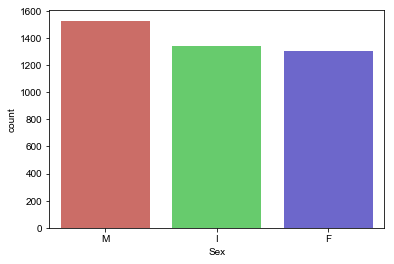

In [3]:
print(data['Sex'].value_counts())

sns.countplot(x='Sex',data = data, palette='hls',order = data['Sex'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

In [4]:
data['Sex']= data['Sex'].replace('M', 1)
data['Sex']= data['Sex'].replace('F', 0)
data['Sex']= data['Sex'].replace('I', 2)

data.head()

,Sex,Length,Diameter,Height,WholeHeight,ShuckedWeight,VisceraWeight,ShellWeight,RingsAge
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Correlation

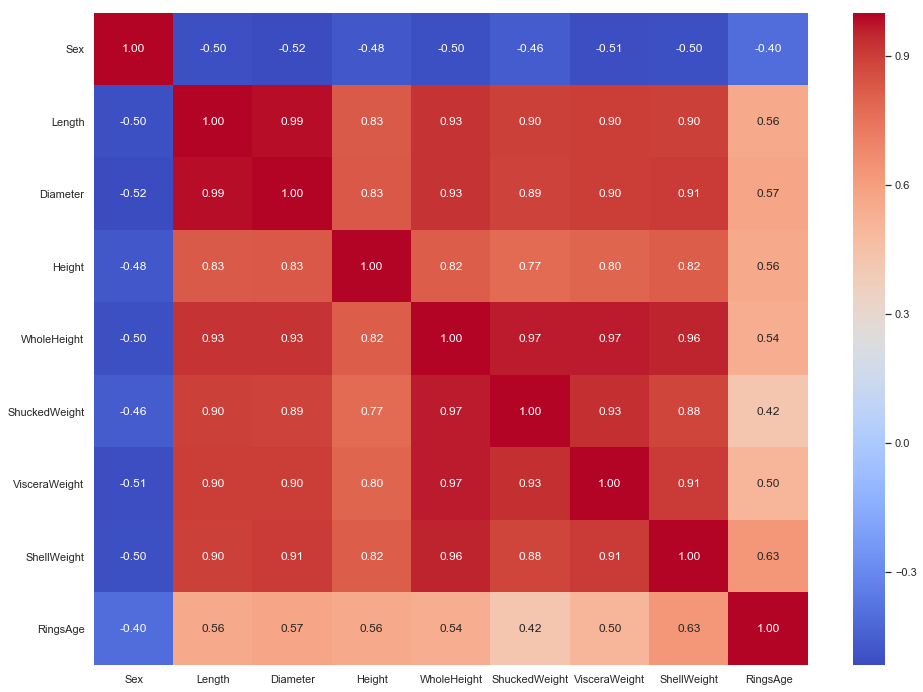

In [5]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

## Data Standardization

In [6]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(data)
X = mms.transform(data)
print('Dataset', X.shape)
X[0:2]

Dataset (4177, 9)


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.5       , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206, 0.5       ],
       [0.5       , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109, 0.21428571]])

## Find the Best K

In [7]:
from sklearn import metrics

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

print(Sum_of_squared_distances)

[1335.7814507150074, 602.8001610115192, 431.1466104662053, 338.4281614173466, 276.0807748459647, 212.54328278176052, 179.433304959672, 156.9015297307177, 140.5406663477326, 125.04989962307545, 115.88282391243443, 107.83713133541116, 99.99357069165366, 94.26718471952618]


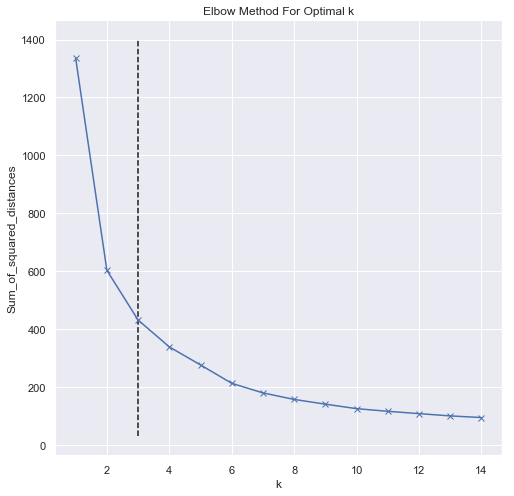

The best k: 3


In [8]:
y = Sum_of_squared_distances
x = range(1, len(y)+1)

from kneed import KneeLocator
kn = KneeLocator(x, y, curve='convex', direction='decreasing')

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

print('The best k:', kn.knee)

## K Mean Clustering Modelling

In [9]:
clusterNum = kn.knee
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print('No. of cluster', labels.shape)
labels[0:10]

No. of cluster (4177,)


array([1, 0, 2, 0, 0, 0, 2, 2, 1, 2])

## Assign Labels Cluster to Dataframe

In [10]:
data["KM_Cluster"] = labels
data.head(5)

,Sex,Length,Diameter,Height,WholeHeight,ShuckedWeight,VisceraWeight,ShellWeight,RingsAge,KM_Cluster
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0


## Cluster 2D Visualization

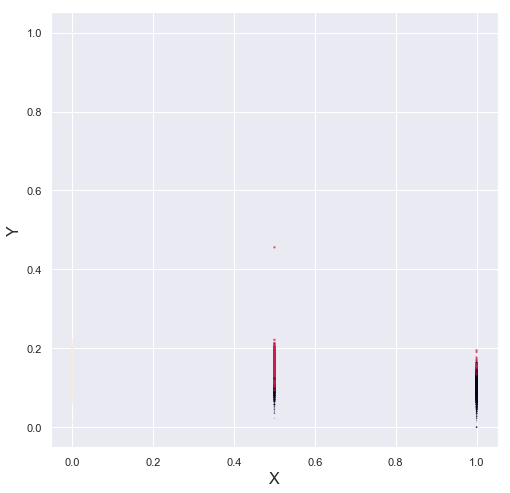

In [11]:
data.groupby('KM_Cluster').mean()

area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.show()

## Cluster 3D Visualization

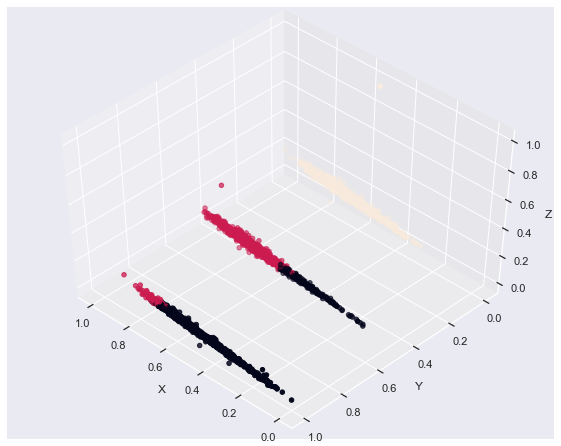

In [12]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

## List and View Cluster

0    1510
1    1360
2    1307
Name: KM_Cluster, dtype: int64


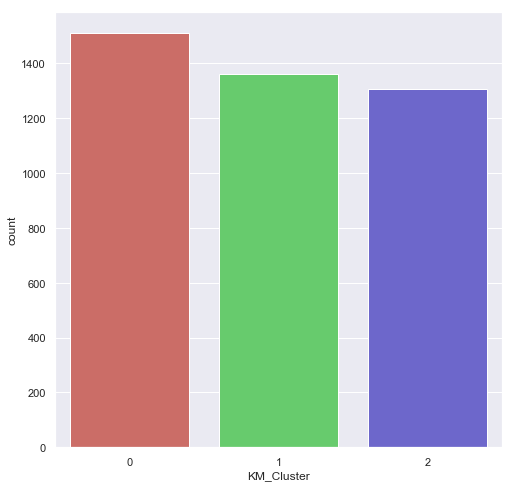

In [13]:
print(data['KM_Cluster'].value_counts())

sns.countplot(x='KM_Cluster',data = data, palette='hls',order = data['KM_Cluster'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

In [14]:
data[data['KM_Cluster']== 0].head(10)

,Sex,Length,Diameter,Height,WholeHeight,ShuckedWeight,VisceraWeight,ShellWeight,RingsAge,KM_Cluster
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0
5,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0
11,1,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10,0
16,2,0.355,0.280,0.085,0.2905,0.0950,0.0395,0.115,7,0
18,1,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.100,7,0
19,1,0.450,0.320,0.100,0.3810,0.1705,0.0750,0.115,9,0
20,1,0.355,0.280,0.095,0.2455,0.0955,0.0620,0.075,11,0
21,2,0.380,0.275,0.100,0.2255,0.0800,0.0490,0.085,10,0
